# Informations

University of Zurich, <br>
Network Science, <br>
Assignment 4

Pietro Bonazzi, <br>
LEGI 17-200-635, <br>
pietro.bonazzi@uzh.ch

# Lib

In [1]:
%run functions.ipynb

# A05.1 Everyday networks are not Poisson: parameter estimation and model selection

Task: For all given networks compute the degree distribution 𝑃(𝑘) and the average degree ⟨𝑘⟩ and use the powerlaw package to fit 𝑃(𝑘).
1. Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘−𝛾 and the corresponding error
2. Superimpose in the same plot of the power-law fit 
- (a) the Poisson and 
- (b) the exponential distribution with mean value equal to ⟨𝑘⟩. 
- Which distribution is more likely to describe the data?
3. What does it mean in practice for the Internet?

In [3]:
folder="Data/5/Data/"
filenames=all_files(folder)
print(filenames)

['graph_internet.gml', 'graph_actors.gml', 'graph_amazon.gml', 'graph_escort.gml']


In [4]:
filenames=['graph_escort.gml', 'graph_amazon.gml']
filenames2=['graph_actors.gml','graph_internet.gml']

Calculating best minimal value for power law fit
xmin progress: 99%

Comparaison for  graph_escort.gml
Power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) :  2.95
Corresponding error :  0.08
Average degree :  4.67


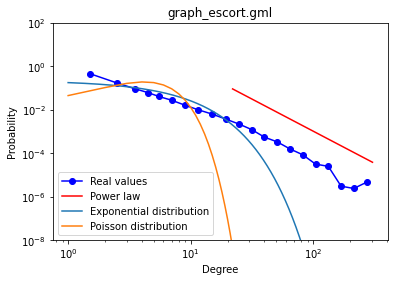

Calculating best minimal value for power law fit
xmin progress: 99%

Comparaison for  graph_amazon.gml
Power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) :  4.07
Corresponding error :  0.1
Average degree :  5.53


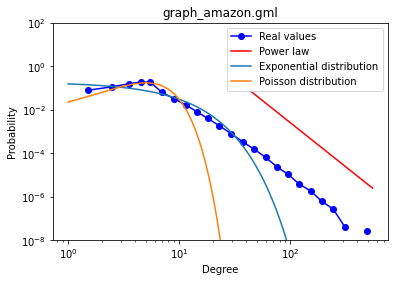

In [ ]:
for i in range(len(filenames)) : 
    graph = nx.read_gml(folder+filenames[i])
    k=degree_vec(graph)
    fit = powerlaw.Fit(k)

    #power law
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    
    print("\n")
    print("Comparaison for ", filenames[i])
    print("Power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) : ", round(alpha,2))
    print("Corresponding error : ", round(sigma,2))

    #poisson and exp
    mu=avg_degree(graph)
    print("Average degree : ", round(mu,2))
    deg,poiss=poisson_dist(k,mu)
    spacing = np.linspace(min(k),max(k),len(k))
    space,expon=exponential_dist(spacing, mu)

    #plot
    powerlaw.plot_pdf(k,color='b',marker='o', label="Real values")
    fit.power_law.plot_pdf(color='r', label="Power law")
    plt.plot(space,expon, label="Exponential distribution")
    plt.plot(deg,poiss, label="Poisson distribution")
    
    plt.legend()
    plt.title(filenames[i])
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.ylim([10**-8,100])
    
    plt.show()

Calculating best minimal value for power law fit
xmin progress: 99%

Comparaison for  graph_actors.gml
Power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) :  2.16
Corresponding error :  0.0
Average degree :  80.18


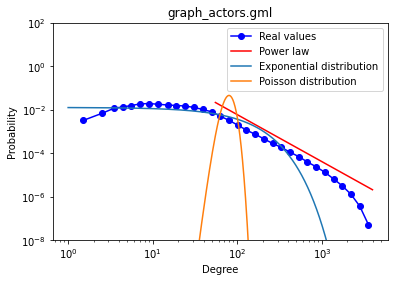

Calculating best minimal value for power law fit
xmin progress: 99%

Comparaison for  graph_internet.gml
Power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) :  2.11
Corresponding error :  0.04
Average degree :  6.2


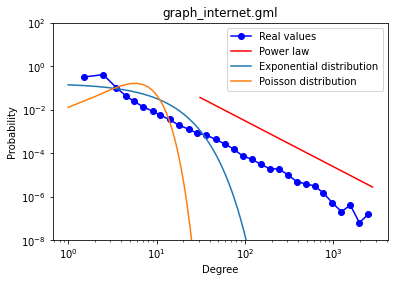

In [5]:
for i in range(len(filenames2)) : 
    graph = nx.read_gml(folder+filenames2[i])
    k=degree_vec(graph)
    fit = powerlaw.Fit(k)

    #power law
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    
    print("\n")
    print("Comparaison for ", filenames2[i])
    print("Power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) : ", round(alpha,2))
    print("Corresponding error : ", round(sigma,2))

    #poisson and exp
    mu=avg_degree(graph)
    print("Average degree : ", round(mu,2))
    deg,poiss=poisson_dist(k,mu)
    spacing = np.linspace(min(k),max(k),len(k))
    space,expon=exponential_dist(spacing, mu)

    #plot
    powerlaw.plot_pdf(k,color='b',marker='o', label="Real values")
    fit.power_law.plot_pdf(color='r', label="Power law")
    plt.plot(space,expon, label="Exponential distribution")
    plt.plot(deg,poiss, label="Poisson distribution")
    
    plt.legend()
    plt.title(filenames2[i])
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.ylim([10**-8,100])
    
    plt.show()

The power law is the more likely distribution to describe the data when the degree is increased. The exponential distribution is also a good alternative to predict the first instances. 

For the internet graph this means that, the majority of nodes , collections of connected IP routing prefixes controlled by independent network operators, have very little physical connections between them. They are important disconnected "hubs". 

# A05.2 Barabási-Albert model
Task: Build networks with the Barabási-Albert model.
Connect 𝑚 = 3 for each new node and grow until 𝑁 = 50, 100, 500, 1000, 5000, then compute some network properties. Compare them with randomised versions of the networks.
1. Compute the average clustering coefficient, assortativity, average shortest path length and diameter
2. Compare them by scatterplots with the same measures on randomised versions of the networks (use log x axis)
3. Which of these measures is relatively unchanged by randomisation? Why?

In [15]:
Nrange_max=[50,100,500,1000,5000]
m=3

assort_res,avg_cc_res,avg_spl_res, diameter_res =[],[],[],[]
assort_res_rnd,avg_cc_res_rnd,avg_spl_res_rnd, diameter_res_rnd =[],[],[],[]

for i in range(len(Nrange_max)):
    g = nx.barabasi_albert_graph(Nrange_max[i],m)
    
    
    print("Barabasi albert graph, N = ", Nrange_max[i])
    
    assort = compute_assortativity_coeff(g)
    print("Assortativity coefficient = ", assort)
    avg_cc = mean_dictionary(compute_clustering_coeff(g))
    print("Average clustering coefficient = ", avg_cc)
    avg_spl = average_shortest_path_length(g)
    print("Average shortest path lenght = ", avg_spl)
    diameter_ = diameter(g)
    print("Diameter = ", diameter_)
    assort_res.append(assort)
    avg_cc_res.append(avg_cc)
    avg_spl_res.append(avg_spl)
    diameter_res.append(diameter_)
    
    print("\n")
    
    grnd=randomise_graph(g)
    print("Barabasi albert randomised graph, N = ", Nrange_max[i])
    assort = compute_assortativity_coeff(grnd)
    print("Assortativity coefficient (grnd) = ", assort)
    avg_cc = mean_dictionary(compute_clustering_coeff(grnd))
    print("Average clustering coefficient (grnd) = ", avg_cc)
    avg_spl = average_shortest_path_length(grnd)
    print("Average shortest path lenght (grnd) = ", avg_spl)
    diameter_ = diameter(grnd)
    print("Diameter (grnd) = ", diameter_)
    assort_res_rnd.append(assort)
    avg_cc_res_rnd.append(avg_cc)
    avg_spl_res_rnd.append(avg_spl)
    diameter_res_rnd.append(diameter_)
    
    print("\n")

Barabasi albert graph, N =  50
Assortativity coefficient =  -0.12492976914337009
Average clustering coefficient =  0.16008682493976611
Average shortest path lenght =  2.333877551020408
Diameter =  4


Barabasi albert randomised graph, N =  50
Assortativity coefficient (grnd) =  -0.0527511767570195
Average clustering coefficient (grnd) =  0.17374703727644902
Average shortest path lenght (grnd) =  2.396734693877551
Diameter (grnd) =  5


Barabasi albert graph, N =  100
Assortativity coefficient =  -0.15698784105232247
Average clustering coefficient =  0.11556625709438777
Average shortest path lenght =  2.5866666666666664
Diameter =  4


Barabasi albert randomised graph, N =  100
Assortativity coefficient (grnd) =  -0.1490208714386354
Average clustering coefficient (grnd) =  0.11861847045876082
Average shortest path lenght (grnd) =  2.62
Diameter (grnd) =  5


Barabasi albert graph, N =  500
Assortativity coefficient =  -0.10803495756830171
Average clustering coefficient =  0.063759079094

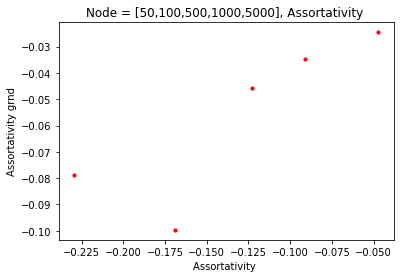

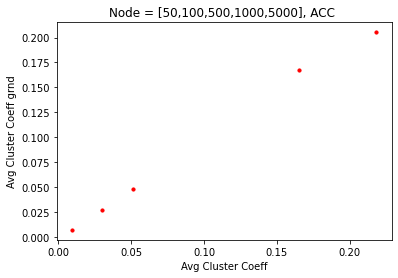

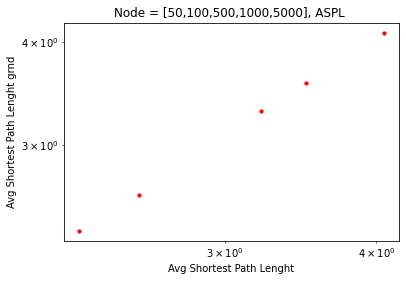

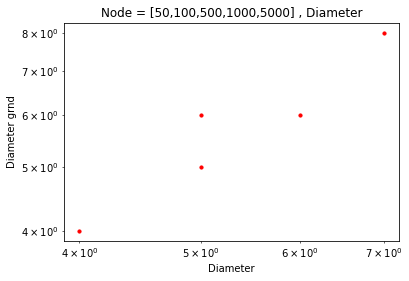

In [14]:
plot_scatter(assort_res, assort_res_rnd,  "Assortativity ", "Assortativity grnd", title="Node = [50,100,500,1000,5000], Assortativity ",y_scale="linear", x_scale="linear")
plot_scatter(avg_cc_res, avg_cc_res_rnd,  "Avg Cluster Coeff", "Avg Cluster Coeff grnd", title="Node = [50,100,500,1000,5000], ACC ",y_scale="linear", x_scale="linear")
plot_scatter(avg_spl_res, avg_spl_res_rnd,  "Avg Shortest Path Lenght", "Avg Shortest Path Lenght grnd", title="Node = [50,100,500,1000,5000], ASPL ",y_scale="log", x_scale="log")
plot_scatter(diameter_res, diameter_res_rnd,  "Diameter", "Diameter grnd", title="Node = [50,100,500,1000,5000] , Diameter",y_scale="log", x_scale="log")

The average shortest path lenght and the average cluster coefficient are relatively unchanged.  
Because the Barabasi albert model is created based on a preferential attachment process that distributes connections among nodes according to how much they already have. Thus, average number of steps along the shortest paths for all possible pairs of network nodes is kept at minimum and the network have practically no clusters.
